In [27]:
ls

Wine_Quality_Check.ipynb  winequality-red.csv
archive/                  winequality-white.csv


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as scikit_learn
import seaborn as sns

In [124]:
red_df_o = pd.read_csv("winequality-red.csv",delimiter=';')
white_df_o = pd.read_csv("winequality-white.csv", delimiter=';')

In [41]:
red_df.head(5)
white_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
red_df.describe()
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [44]:
# for index, row in wine_df.iterrows():
#     print(row['quality'])
red_df.shape , white_df.shape

((1599, 12), (4898, 12))

In [46]:
# red_df.info() 
white_df.info()
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [49]:
white_df.duplicated().sum(), red_df.duplicated().sum()

(937, 240)

In [50]:
red_df['quality'].nunique() , white_df['quality'].nunique()

(6, 7)

In [54]:
# red_df['color'] = 'red'
white_df['color'] = 'white'

In [55]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [70]:
wine_df = pd.concat([red_df,white_df], axis=0)

In [72]:
wine_df.shape, (red_df.shape[0] + white_df.shape[0])

((6497, 13), 6497)

In [73]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [74]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

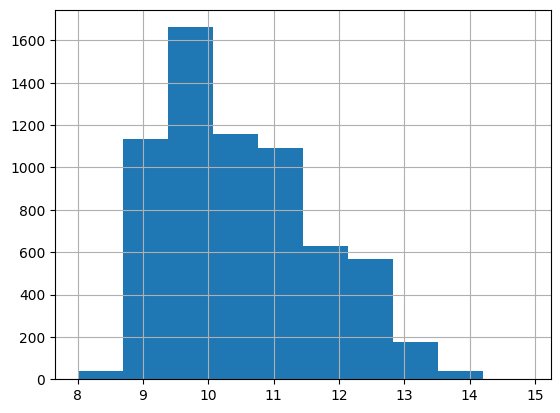

In [111]:

# Observations: 'fixed acidity' and 'alcohol' have a right skew. This means presence of outliers and they can 
#                influence the results in a certain direction (will "drag" the mean/average up...so that it will be 
#                less representative of the data as a whole..).




# wine_df['fixed acidity'].hist();
# wine_df['fixed acidity'].plot();
# wine_df['volatile acidity'].hist();
# wine_df['volatile acidity'].plot();
# wine_df['citric acid'].hist();
# wine_df['chlorides'].hist();
# wine_df['chlorides'].plot();
# wine_df['total sulfur dioxide'].hist();
# wine_df['total sulfur dioxide'].plot();
# wine_df['free sulfur dioxide'].hist();
# wine_df['free sulfur dioxide'].plot();
# wine_df['density'].hist();
# wine_df['density'].plot();
# wine_df['pH'].hist();
wine_df['alcohol'].hist();

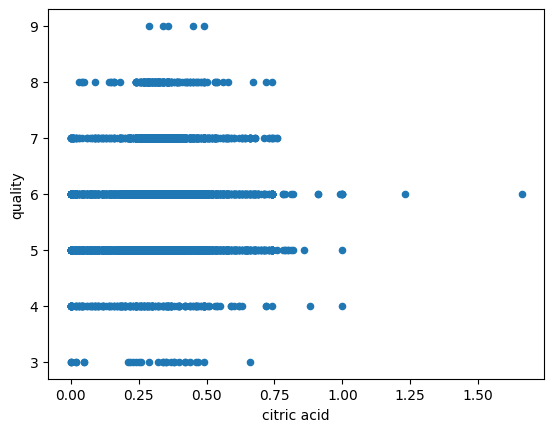

In [116]:
wine_df.plot(x = 'citric acid', y ='quality', kind = 'scatter');

In [114]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [ ]:
# Based on the data set, we have come up with these questions that we would like to answer in our analysis.

# Is a certain type of wine (red or white) associated with higher quality?
# Do wines with higher alcoholic content receive better ratings?
# Do sweeter wines (more residual sugar) receive better ratings?
# What level of acidity is associated with the highest quality?

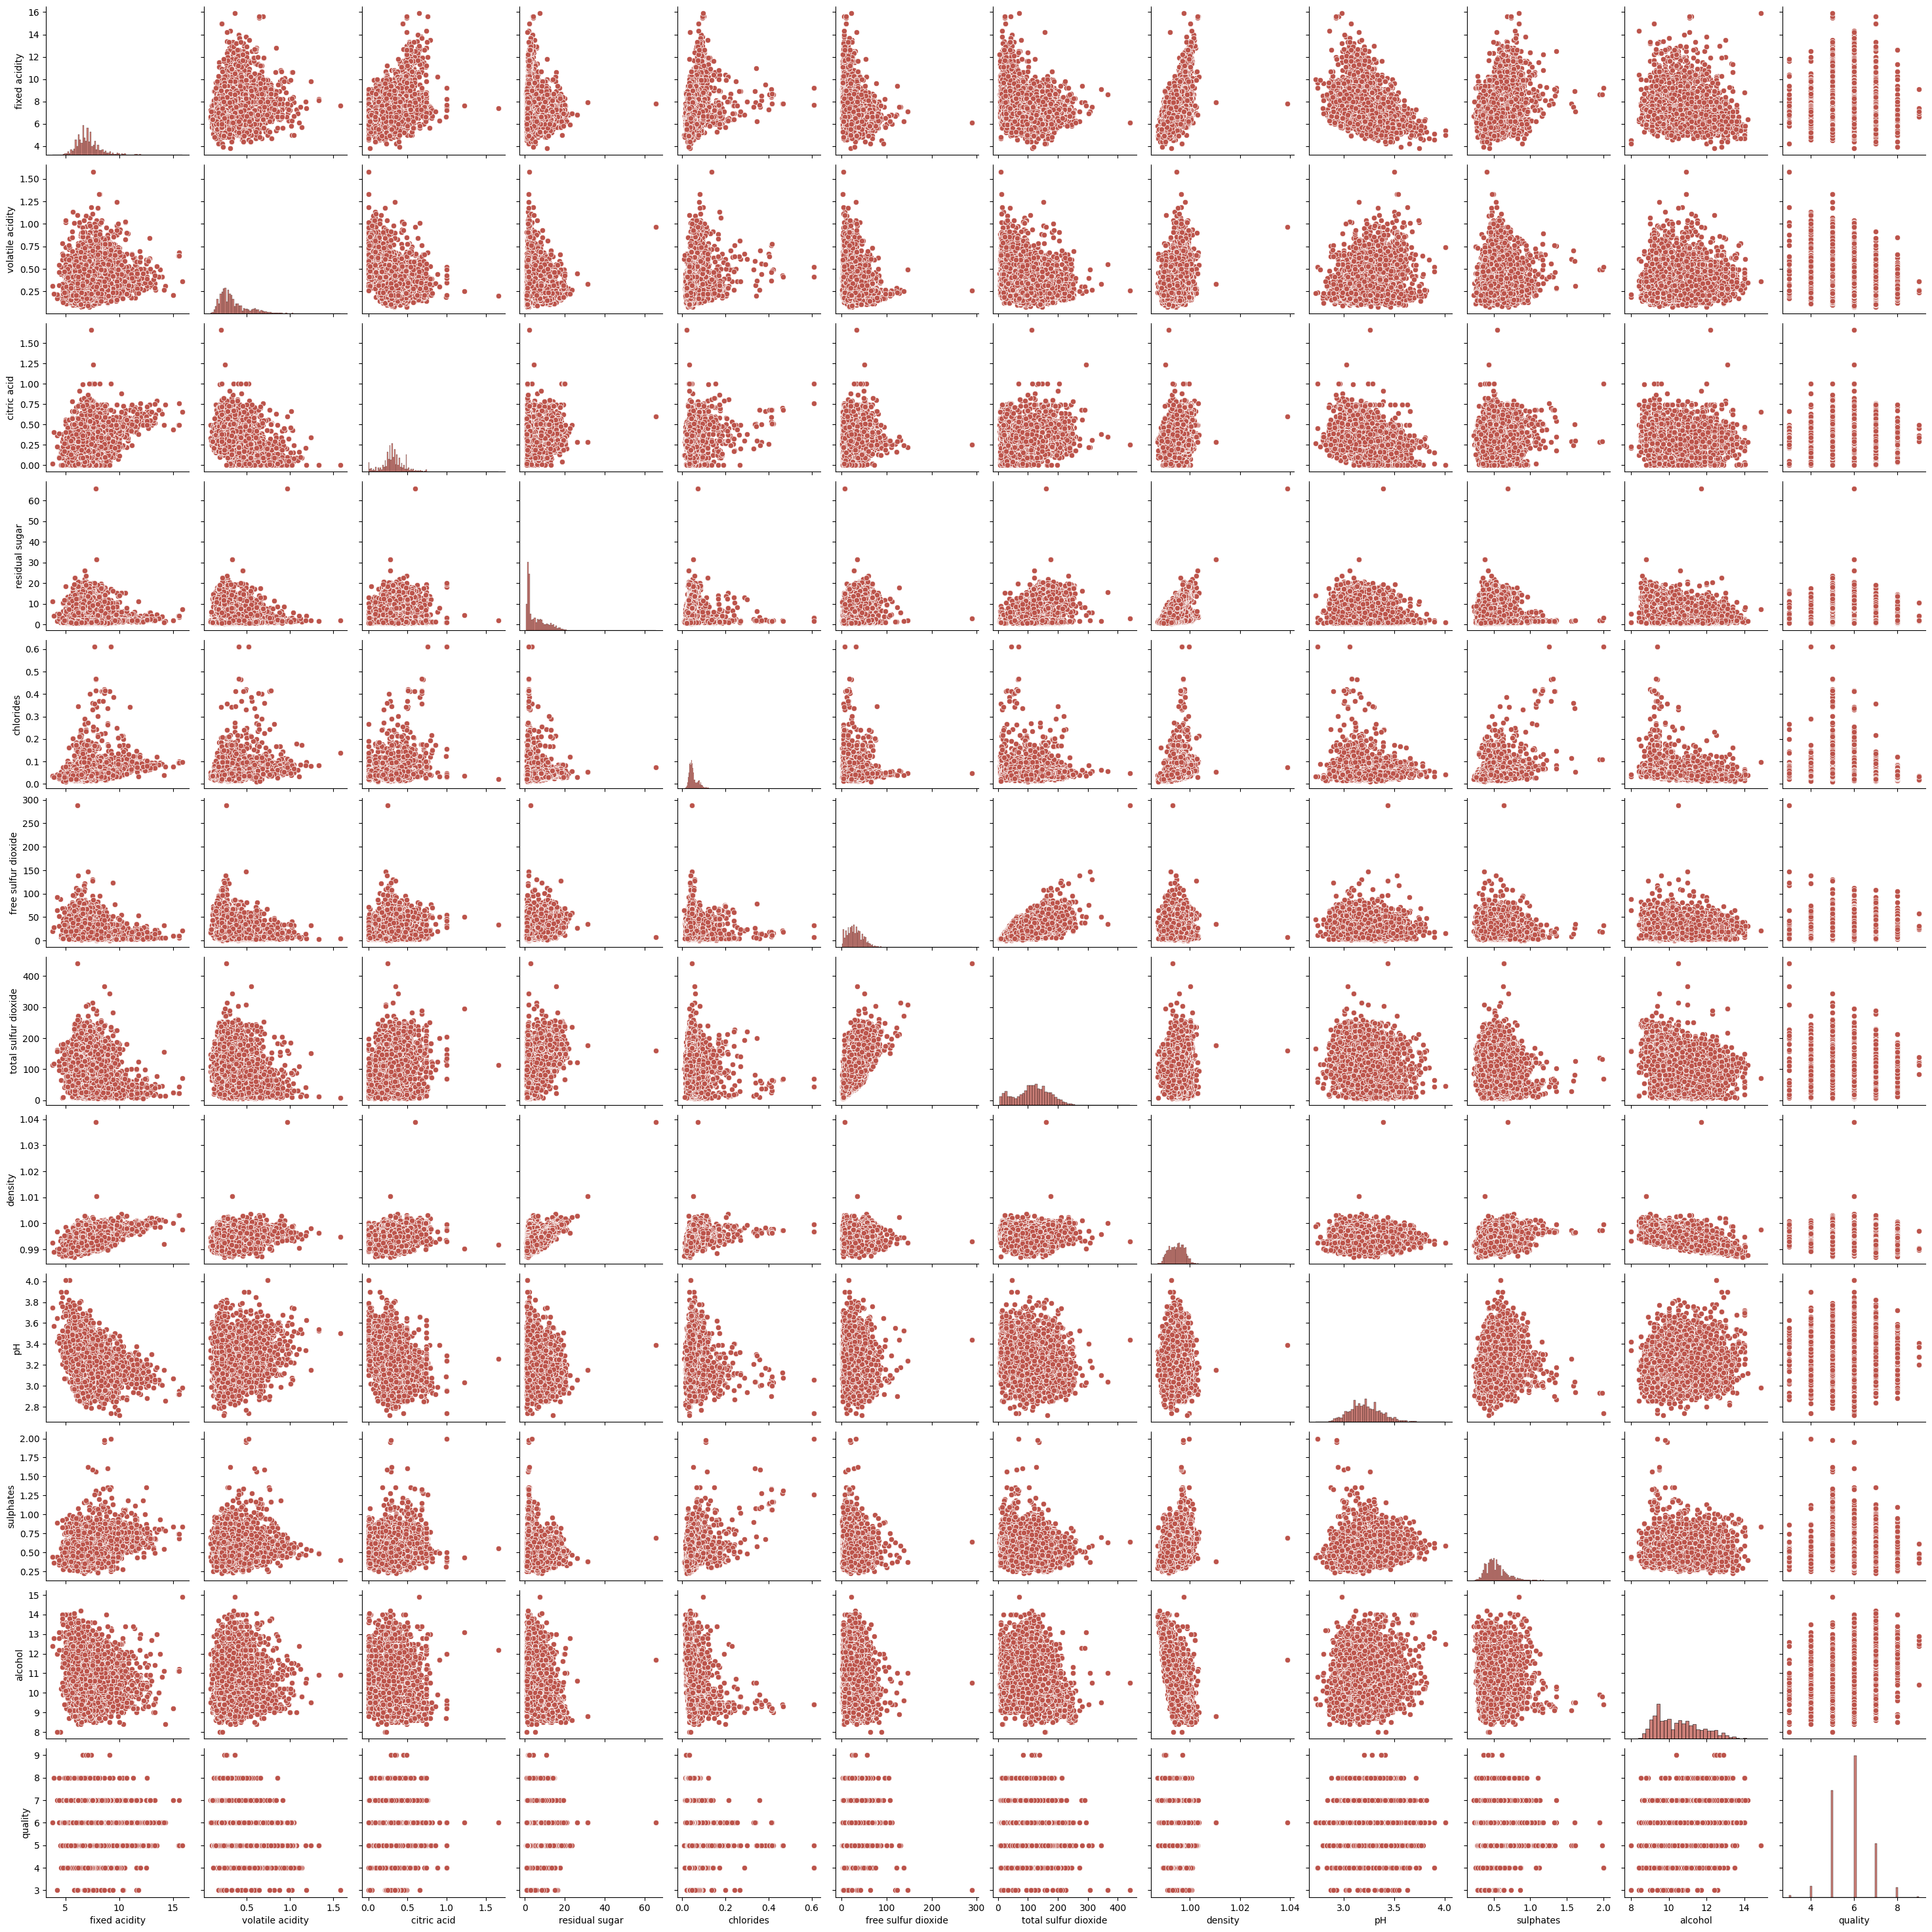

In [120]:
# Define a custom color palette
custom_palette = ['#BC544B']

# Set the custom color palette
sns.set_palette(custom_palette)

# Create the pair plot
sns.pairplot(wine_df)

# Display the plot
plt.show()

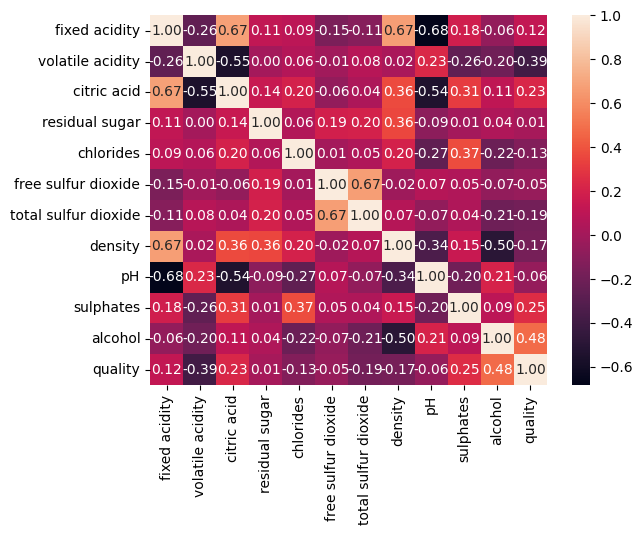

In [127]:
# sns.heatmap(red_df_o.corr(), annot=True, fmt='.2f')
# plt.show()

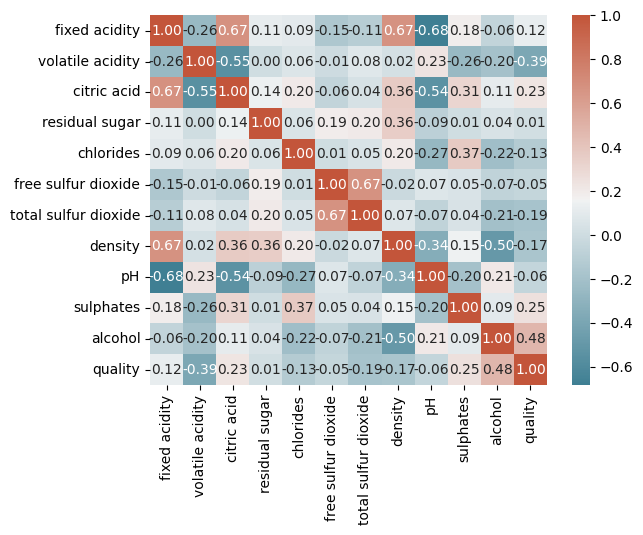

In [126]:
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(red_df_o.corr(), annot=True, fmt='.2f', cmap=custom_cmap)

# Display the plot
plt.show()

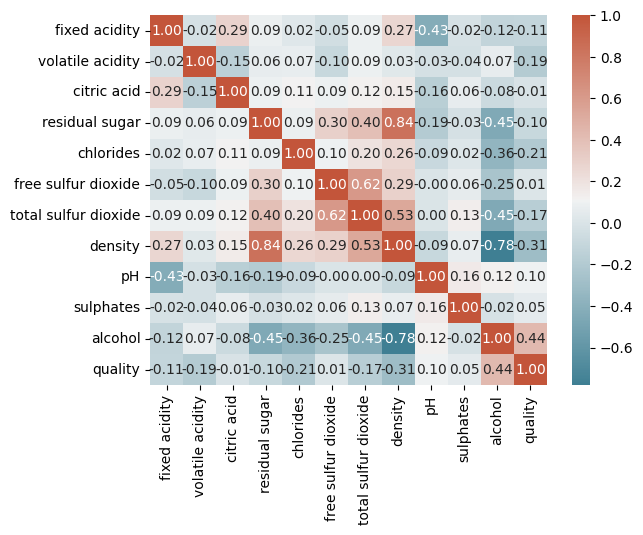

In [128]:
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(white_df_o.corr(), annot=True, fmt='.2f', cmap=custom_cmap)

# Display the plot
plt.show()

In [129]:
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [135]:
# What level of acidity receives the highest average rating?
wine_df['pH'].dtype

dtype('float64')

In [137]:
# wine_df
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [144]:
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

# Labels for the four acidity level groups
bin_names = ['High','Moderately high','Medium','Low']

In [145]:
wine_df['acidity_limit'] = pd.cut(wine_df['pH'] , bins = bin_edges, labels = bin_names )

In [146]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_limit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [148]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_limit')['quality'].mean()


# Wine is low acidity level/ pH receives the highest average rating, followed closely by medium acidity level.
# We can conclude that the lower the acidity level, the higher the quality of wine.

/var/folders/cd/mxhrztb17vd97qczhjryjz380000gp/T/ipykernel_1172/1761818111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('acidity_limit')['quality'].mean()


acidity_limit
High               5.783343
Moderately high    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

In [ ]:
Do wines with higher alcoholic content receive better ratings?